<a href="https://colab.research.google.com/github/elenakrivobokova/-/blob/main/%D0%9F%D1%80%D0%B8%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_3_%D0%BA%D0%BE%D0%B4_%D0%BD%D0%B0_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# устанавливаем библиотеки
!pip install mplfinance
!pip install yfinance
!pip install pandas_ta


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=e563f4b2bfa71a99b55b82700da56978574e96f16a57db95c6eb3ff095d0face
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
# импортируем библиотеки для работы
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
import scipy
import math
import pandas_ta as ta

import datetime
from datetime import date


import seaborn as sns
import math
import plotly.graph_objects as go
from scipy.stats import gaussian_kde
from scipy.signal import find_peaks

In [ ]:
# загружаем данные с Yahoo finance для выбранного периода
Asset = yf.download('BTC-USD', start=datetime.datetime (2017,1, 1), end= datetime.datetime (2018, 1, 1))
Asset['SMA'] = Asset[['Close']].ta.sma(length=100)
Asset['SMA_prev'] = Asset['SMA'].shift(1)


[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Рассчитаем оптимальное количество корзин по правилам Скотта и Фридмана-Диакониса

# Стандартное отклонение данных
sigma = np.std(Asset['Close'])

# Межквартильный размах (IQR)
IQR = np.percentile(Asset['Close'], 75) - np.percentile(Asset['Close'], 25)

# Расчет по правилу Скотта
bin_width_scott = 3.5 * sigma / (len(Asset)**(1/3))
bins_scott = (max(Asset['Close']) - min(Asset['Close'])) / bin_width_scott

# Расчет по правилу Фридмана-Диакониса
bin_width_fd = 2 * IQR / (len(Asset)**(1/3))
bins_fd = (max(Asset['Close']) - min(Asset['Close'])) / bin_width_fd

bins_scott_rounded = round(bins_scott)
bins_fd_rounded = round(bins_fd)

bins_scott_rounded, bins_fd_rounded

(9, 20)

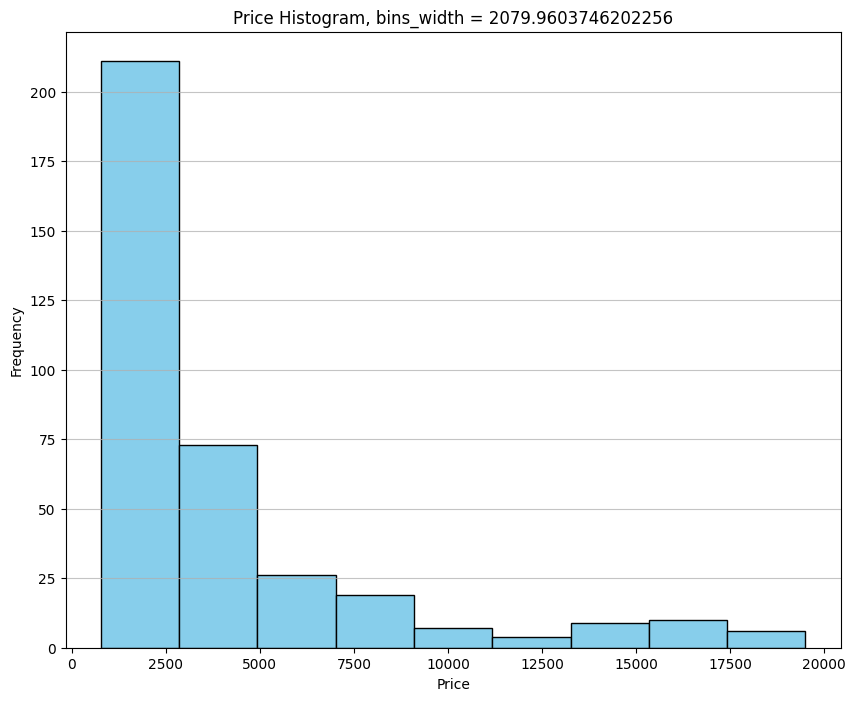

In [ ]:
# Создаем гистограмму используя цены закрытия
bins_width_scott = (Asset['Close'].max() - Asset['Close'].min()) / bins_scott_rounded
plt.figure(figsize=(10, 8))
plt.hist(Asset['Close'], bins=bins_scott_rounded, color='skyblue', edgecolor='black')

plt.title(f'Price Histogram, bins_width = {bins_width_scott}')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Отображаем гистограмму
plt.show()

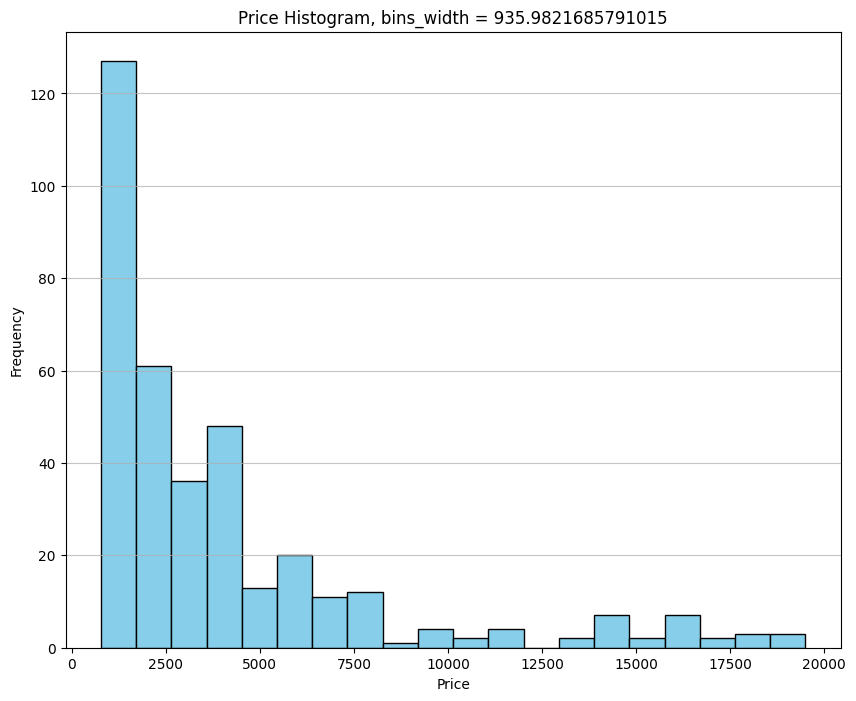

In [ ]:
# Создаем гистограмму используя цены закрытия
bins_width_fd = (Asset['Close'].max() - Asset['Close'].min()) / bins_fd_rounded
plt.figure(figsize=(10, 8))
plt.hist(Asset['Close'], bins=bins_fd_rounded, color='skyblue', edgecolor='black')

plt.title(f'Price Histogram, bins_width = {bins_width_fd}')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Отображаем гистограмму
plt.show()

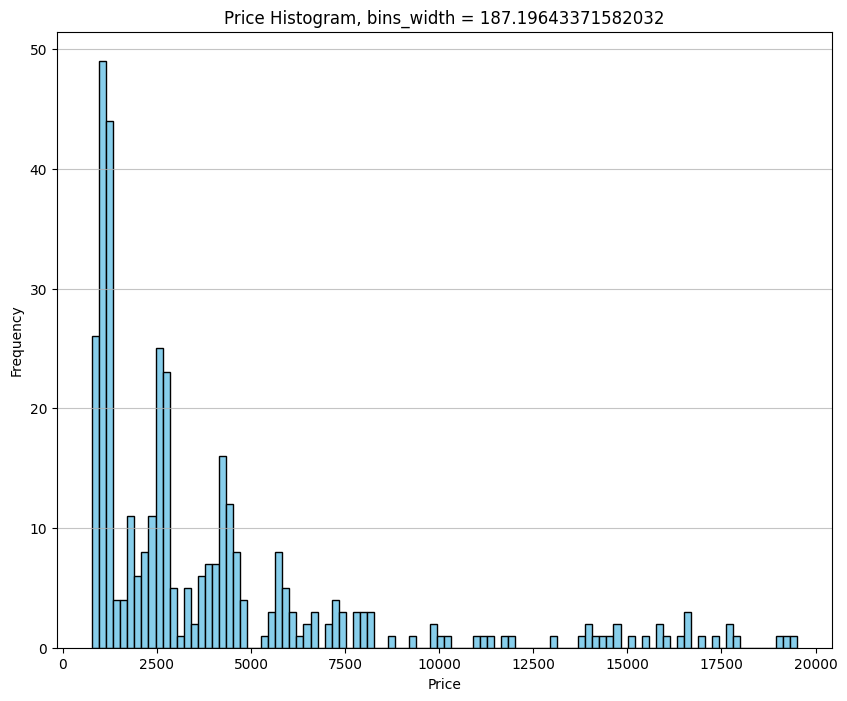

In [ ]:
# Создаем гистограмму используя цены закрытия
bins_width = (Asset['Close'].max() - Asset['Close'].min()) / 100
plt.figure(figsize=(10, 8))
plt.hist(Asset['Close'], bins=100, color='skyblue', edgecolor='black')

plt.title(f'Price Histogram, bins_width = {bins_width}')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Отображаем гистограмму
plt.show()

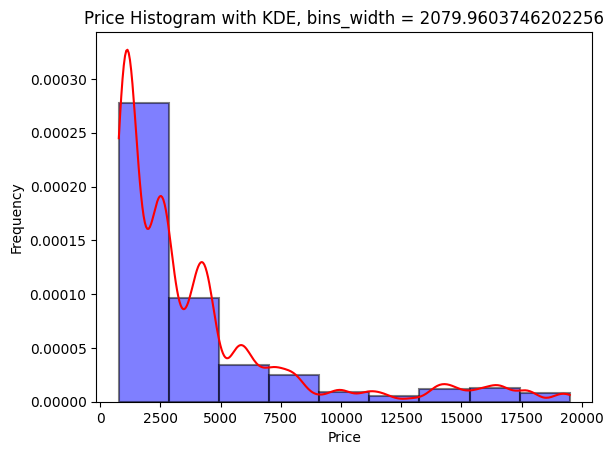

In [ ]:
# Генерация гистограммы
plt.hist(Asset['Close'], bins=bins_scott_rounded, density=True, alpha=0.5, color='blue', edgecolor='black', linewidth=1.5)

# Создание объекта KDE
kde = gaussian_kde(Asset['Close'], bw_method=0.1)

# Определение диапазона для графика
x_values = np.linspace(Asset['Close'].min(), Asset['Close'].max(), len(Asset))

# Вычисление значений KDE
kde_values = kde(x_values)

# Визуализация кривой KDE
plt.plot(x_values, kde_values, color='red')

plt.title(f'Price Histogram with KDE, bins_width = {bins_width_scott}')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

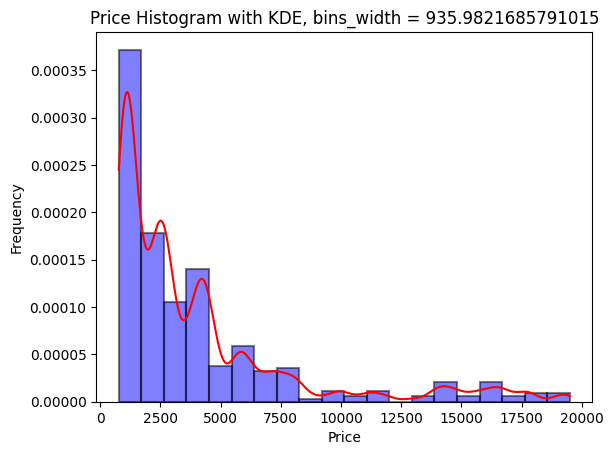

In [ ]:
# Генерация гистограммы
plt.hist(Asset['Close'], bins=bins_fd_rounded, density=True, alpha=0.5, color='blue', edgecolor='black', linewidth=1.5)

# Создание объекта KDE
kde = gaussian_kde(Asset['Close'], bw_method=0.1)

# Определение диапазона для графика
x_values = np.linspace(Asset['Close'].min(), Asset['Close'].max(), len(Asset))

# Вычисление значений KDE
kde_values = kde(x_values)

# Визуализация кривой KDE
plt.plot(x_values, kde_values, color='red')

plt.title(f'Price Histogram with KDE, bins_width = {bins_width_fd}')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

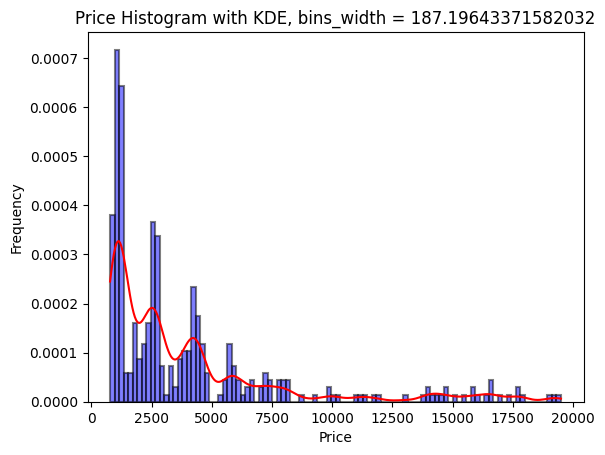

In [ ]:
# Генерация гистограммы
plt.hist(Asset['Close'], bins=100, density=True, alpha=0.5, color='blue', edgecolor='black', linewidth=1.5)

# Создание объекта KDE
kde = gaussian_kde(Asset['Close'], bw_method=0.1)

# Определение диапазона для графика
x_values = np.linspace(Asset['Close'].min(), Asset['Close'].max(), len(Asset))

# Вычисление значений KDE
kde_values = kde(x_values)

# Визуализация кривой KDE
plt.plot(x_values, kde_values, color='red')

plt.title(f'Price Histogram with KDE, bins_width = {bins_width}')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

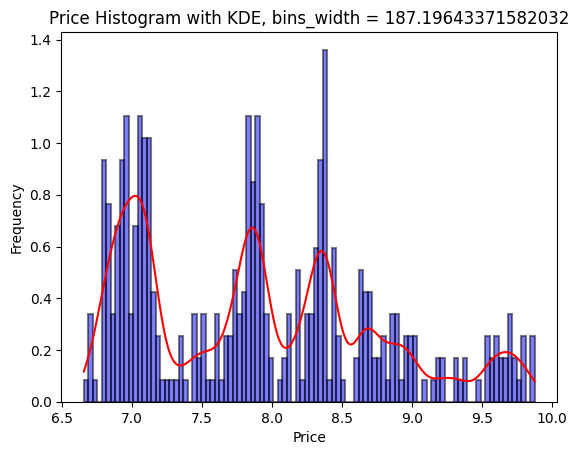

In [ ]:
# Логарифмирование данных
log_data = np.log(Asset['Close'])

# Генерация гистограммы
plt.hist(log_data, bins=100, density=True, alpha=0.5, color='blue', edgecolor='black', linewidth=1.5)

# Создание объекта KDE
kde = gaussian_kde(log_data, bw_method=0.1)

# Определение диапазона для графика
x_values = np.linspace(log_data.min(), log_data.max(), len(Asset))

# Вычисление значений KDE
kde_values = kde(x_values)

# Визуализация кривой KDE
plt.plot(x_values, kde_values, color='red')

plt.title(f'Price Histogram with KDE, bins_width = {bins_width}')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

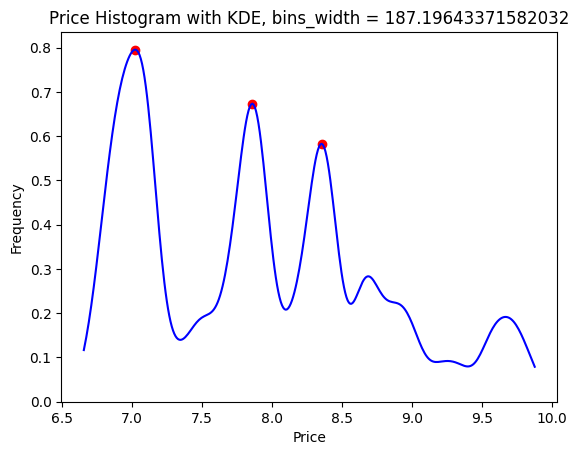

In [ ]:
# Логарифмирование данных
log_data = np.log(Asset['Close'])

# Генерация гистограммы
plt.hist(log_data, bins=10, density=True, alpha=0.5, color='white', linewidth=1.5)

# Создание объекта KDE
kde = gaussian_kde(log_data, bw_method=0.1)

# Определение диапазона для графика
x_values = np.linspace(log_data.min(), log_data.max(), len(Asset))

# Вычисление значений KDE
kde_values = kde(x_values)

# Находим локальные максимумы на кривой KDE
peaks, prom = find_peaks(kde_values, prominence = 0.2)

# Выделение пиков на кривой
for peak in peaks:
    plt.plot(x_values[peak], kde_values[peak], 'ro')

# Визуализация кривой KDE
plt.plot(x_values, kde_values, color='blue')

plt.title(f'Price Histogram with KDE, bins_width = {bins_width}')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
Asset['ATR'] = ta.atr(np.log(Asset['High']), np.log(Asset['Low']), np.log(Asset['Close']), 30).shift(1)
atr = Asset.iloc[-1, -1]
atr

0.10562035332142912

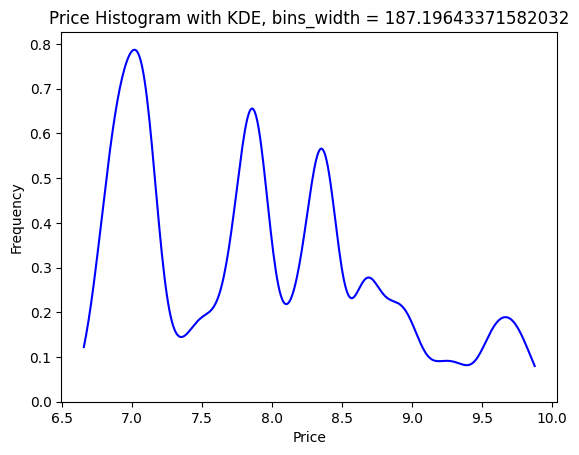

In [ ]:
# Логарифмирование данных

log_data = np.log(Asset['Close'])

# Генерация гистограммы
plt.hist(log_data, bins=10, density=True, alpha=0.5, color='white', linewidth=1.5)

# Создание объекта KDE
kde = gaussian_kde(log_data, bw_method=atr)

# Определение диапазона для графика
x_values = np.linspace(log_data.min(), log_data.max(), len(Asset))

# Вычисление значений KDE
kde_values = kde(x_values)


# Визуализация кривой KDE
plt.plot(x_values, kde_values, color='blue')

plt.title(f'Price Histogram with KDE, bins_width = {bins_width}')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# установим веса

def set_weights(last_w, first_w, df):
  df_logged = np.log(df['Close'])
  w_step = (last_w - first_w) / len(df_logged)
  weights = first_w + np.arange(len(df_logged)) * w_step
  weights[weights < 0] = 0.0

  # Создание объекта KDE
  kde = gaussian_kde(df_logged, bw_method=0.1, weights=weights)

  return kde


kde_1 = set_weights(1.0, 1.0, Asset)
kde_2 = set_weights(1.0, 0.1, Asset)
kde_3 = set_weights(1.0, 0.5, Asset)

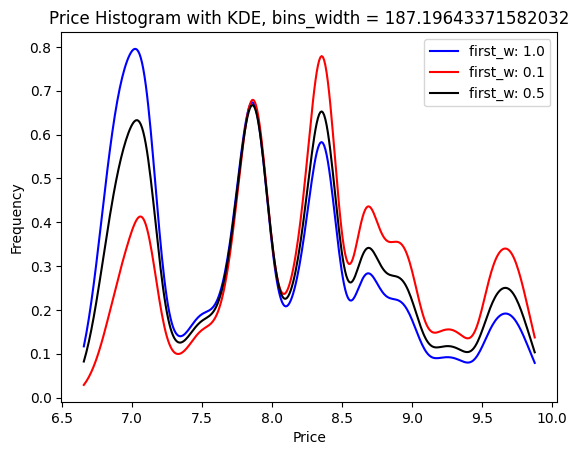

In [ ]:
# Логарифмирование данных
log_data = np.log(Asset['Close'])


# Определение диапазона для графика
x_values = np.linspace(log_data.min(), log_data.max(), len(Asset))

# Вычисление значений KDE
kde_values_1 = kde_1(x_values)
kde_values_2 = kde_2(x_values)
kde_values_3 = kde_3(x_values)

# Визуализация кривой KDE
plt.plot(x_values, kde_values_1, color='blue', label='first_w: 1.0')
plt.plot(x_values, kde_values_2, color='red', label='first_w: 0.1')
plt.plot(x_values, kde_values_3, color='black', label='first_w: 0.5')
# Добавление легенды
plt.legend()
plt.title(f'Price Histogram with KDE, bins_width = {bins_width}')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
def find_levels(
        price: np.array, atr: float, # Log closing price, and log atr
        first_w,
        atr_mult,
        prom_thresh
):

    # Setup weights
    last_w = 1.0
    w_step = (last_w - first_w) / len(price)
    weights = first_w + np.arange(len(price)) * w_step
    weights[weights < 0] = 0.0

    # Get kernel of price.
    kernal = scipy.stats.gaussian_kde(price, bw_method=atr * atr_mult, weights=weights)

    # Construct market profile
    min_v = np.min(price)
    max_v = np.max(price)
    step = (max_v - min_v) / 200
    price_range = np.arange(min_v, max_v, step)
    pdf = kernal(price_range) # Market profile

    # Find significant peaks in the market profile
    pdf_max = np.max(pdf)
    prom_min = pdf_max * prom_thresh

    peaks, props = scipy.signal.find_peaks(pdf, prominence=prom_min)
    levels = []
    for peak in peaks:
        levels.append(np.exp(price_range[peak]))

    return levels, peaks, props, price_range, pdf, weights




def support_resistance_levels(
        data: pd.DataFrame, lookback: int,
        first_w: float, atr_mult:float, prom_thresh:float
):

    # Get log average true range,
    atr = ta.atr(np.log(data['High']), np.log(data['Low']), np.log(data['Close']), lookback)

    all_levels = [None] * len(data)
    for i in range(lookback, len(data)):
        i_start  = i - lookback
        vals = np.log(data.iloc[i_start+1: i+1]['Close'].to_numpy())
        levels, peaks, props, price_range, pdf, weights= find_levels(vals, atr.iloc[i], first_w, atr_mult, prom_thresh)
        all_levels[i] = levels

    return all_levels, peaks, price_range

In [ ]:
Asset = yf.download('BTC-USD', start=datetime.datetime (2015,1, 1), end= datetime.datetime (2024, 3, 1))
Asset['SMA'] = Asset[['Close']].ta.sma(length=100)
Asset['SMA_prev'] = Asset['SMA'].shift(1)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
levels, peaks, pdf = support_resistance_levels(Asset, 365, first_w = 0.1, atr_mult = 2.0, prom_thresh =0.35)
Asset['levels'] = levels
levels_expanded = Asset.explode('levels')
levels_expanded['levels'] = pd.to_numeric(levels_expanded['levels'], errors='coerce')


In [ ]:
# Преобразование строк в даты
start_date = pd.to_datetime('2016-1-1')
end_date = start_date + pd.Timedelta(days=365)

fig = go.Figure(data=[go.Candlestick(x=levels_expanded.loc[start_date:end_date].index,
                open=levels_expanded['Open'].loc[start_date:end_date],
                high=levels_expanded['High'].loc[start_date:end_date],
                low=levels_expanded['Low'].loc[start_date:end_date],
                close=levels_expanded['Close'].loc[start_date:end_date],
                increasing_line_color= 'green',
                decreasing_line_color= 'red')])


fig.add_scatter(x=levels_expanded.loc[start_date:end_date].index, y=levels_expanded['levels'].loc[start_date:end_date], mode="markers",
                marker=dict(size=5, color="MediumPurple"),
                name="pivot_level")

# fig.add_bar(x=levels_expanded.index, y=levels_expanded['Volume'],
#             marker_color='lightblue', yaxis='y2', name='Volume')

# # Настройка второй оси Y для объемов
# fig.update_layout(
#     yaxis2=dict(
#         overlaying='y',
#         side='right',
#         showgrid=False,
#     )
# )


fig.update_layout(
    width=800,  # Устанавливает ширину графика
    height=600,  # Устанавливает высоту графика
    paper_bgcolor='white',
    plot_bgcolor='black'
)

# fig.update_layout(xaxis_rangeslider_visible=False)
# fig.update_xaxes(showgrid=False)
# fig.update_yaxes(showgrid=False)
# fig.update_layout(paper_bgcolor='white', plot_bgcolor='black')

fig.show()

In [ ]:
def add_row(df: pd.DataFrame, row_data: dict):
    return pd.concat([df, pd.DataFrame([row_data])], ignore_index=True)

# Функция для определения пробоя уровня сопротивления
def find_breakouts(row, previous_close):
    # Возвращаем только те уровни, которые выше предыдущего закрытия
    potential_resistance = [level for level in row['levels'] if level > previous_close]
    # Проверяем, превышает ли текущее закрытие любой из потенциальных уровней сопротивления
    breakouts = [level for level in potential_resistance if row['Close'] > level * 1.015]
    return breakouts


def find_test_signal(Close_price: float, Low_price: float, broken_level: float, ATR: float):
  # support_range_upper = max(1.01, 1 + (ATR / 2 / broken_level))
  support_range_upper = 1.015
  support_range_lower = min(0.99, 1 - (ATR / 2 / broken_level))
  if broken_level * support_range_lower <= Close_price <= broken_level * support_range_upper:
    return 'Test'
  elif Low_price <= broken_level * support_range_upper:
    return 'Test'

def find_buy_signal(Open_price: float, broken_level:float, ATR: float):
  support_range_lower = min(0.99, 1 - (ATR / 2 / broken_level))
  if Open_price >= broken_level * support_range_lower:
    return 'Buy'

def find_sell_signal(close_price: float,
                low_price: float,
                high_price: float,
                buy_price:float,
                broken_level: float,
                ATR: float,
                SMA_cur: float,
                SMA_prev: float,
                take_profit: float,
                stop_loss: float):

  support_range_lower = min(0.99, 1 - (ATR / 2 / broken_level))
  take_profit_price = buy_price * (1 + take_profit / 100)
  if low_price < ((1 - stop_loss / 100) * broken_level):
    sell_price = (1 - stop_loss / 100) * broken_level
    return 'Sell', sell_price
  elif (SMA_cur < SMA_prev) and (high_price >  take_profit_price):
    sell_price = close_price
    return 'Sell', sell_price
  else:
    return None, None

In [ ]:
Asset['levels'] = Asset['levels'].apply(lambda x: x if isinstance(x, list) else [])
Asset['ATR'] = ta.atr(Asset['High'], Asset['Low'], Asset['Close'], 60).shift(1)

breakouts_list = pd.DataFrame(columns=['Date', 'breakout_level'])
test_lists = pd.DataFrame(columns=['Date', 'Close', 'tested_level'])
Buy_lists = pd.DataFrame(columns=['Date', 'Close', 'buy_price'])
Sell_lists = pd.DataFrame(columns=['Date', 'Close', 'sell_price'])


find_break_condition = True # Получаем дату и значение пробитого уровня.
find_test_condition = False  # Получаем дату и значение оттестированного уровня. Тестируем ранее пробитый уровень, не текущий. Это важно!
find_Buy_condition = False # Получаем дату и цену покупки актива
find_Sell_condition = False # Получаем дату и цену продажи актива

# Параметры для функции find_sell_signal
take_profit = 5  # Пример значения
stop_loss = 2  # Пример значения

# Обработка DataFrame
previous_close = Asset['Close'].iloc[0]
for index, row in Asset.iterrows():
    if index > Asset.index[0]:
        if find_break_condition:
            breakouts = find_breakouts(row, previous_close)
            if breakouts:
                last_breakout_level = breakouts[0]  # Обновляем последний уровень пробоя
                # Записываем пробитый уровень
                breakouts_list = add_row(breakouts_list, {'Date': row.name, 'breakout_level': breakouts[0]})
                find_test_condition = True  # Устанавливаем флаг для поиска теста
                find_break_condition = False

        elif find_test_condition:
            # Предполагаем, что 'broken_level' - это последний пробитый уровень
            broken_level = breakouts_list['breakout_level'].iloc[-1]
            test_signal = find_test_signal(Close_price = row['Close'],
                                           Low_price = row['Low'],
                                           broken_level = broken_level,
                                           ATR = row['ATR'])
            if test_signal:
                test_lists =  add_row(test_lists, {'Date': row.name, 'Close' : row['Close'], 'tested_level': broken_level})
                find_Buy_condition = True  # Устанавливаем флаг для поиска сигнала к покупке
                find_test_condition = False
        elif find_Buy_condition:
            broken_level = breakouts_list[breakouts_list['Date'] <= row.name]['breakout_level'].iloc[-1]
            buy_signal = find_buy_signal(row['Open'], broken_level, row['ATR'])
            if buy_signal:
                Buy_lists =  add_row(Buy_lists, {'Date': row.name, 'Close' : row['Close'], 'buy_price': row['Open']})
                find_Sell_condition = True  # Устанавливаем флаг для поиска сигнала к продаже
                find_Buy_condition = False

        elif find_Sell_condition:
            buy_price = Buy_lists[Buy_lists['Date'] <= row.name]['buy_price'].iloc[-1]
            sell_signal, sell_price = find_sell_signal(
                row['Close'],
                row['Low'],
                row['High'],
                buy_price,
                broken_level,
                row['ATR'],
                row['SMA'],
                row['SMA_prev'],
                take_profit,
                stop_loss
            )
            if sell_signal:
                Sell_lists =  add_row(Sell_lists, {'Date': row.name, 'Close' : row['Close'], 'sell_price': sell_price})
                # Сбрасываем флаги после продажи
                find_break_condition = True
                find_test_condition = False
                find_Buy_condition = False
                find_Sell_condition = False

        # Обновляем предыдущее закрытие для следующей итерации
        previous_close = row['Close']

In [ ]:
breakouts_list[1:]

,Date,breakout_level
1,2017-01-21,903.439005
2,2018-04-20,8345.984441
3,2018-08-24,6537.115655
4,2018-09-27,6514.438215
5,2019-02-08,3606.992002
6,2019-04-30,5254.284421
7,2020-04-23,7270.410860


In [ ]:
test_lists[1:]

,Date,Close,tested_level
1,2017-01-22,924.672974,903.439005
2,2018-05-11,8441.490234,8345.984441
3,2018-08-26,6707.259766,6537.115655
4,2018-09-28,6644.129883,6514.438215
5,2019-02-09,3671.203613,3606.992002
6,2020-03-12,4970.788086,5254.284421


In [ ]:
Buy_lists

,Date,Close,buy_price
0,2016-03-29,416.515991,424.303986
1,2017-01-23,921.012024,925.499023
2,2018-05-12,8504.889648,8441.440430
3,2018-08-27,6884.640137,6710.799805
4,2018-09-29,6601.959961,6643.100098
5,2019-02-10,3690.188232,3673.201416
6,2020-03-14,5200.366211,5573.077637


In [ ]:
Sell_lists

,Date,Close,sell_price
0,2016-09-20,608.312012,608.312012
1,2018-03-08,9395.009766,9395.009766
2,2018-05-14,8716.790039,8716.790039
3,2018-08-28,7096.279785,7096.279785
4,2018-10-11,6256.240234,6384.149451
5,2019-02-18,3915.714355,3915.714355
6,2020-03-16,5014.479980,5149.198732


In [ ]:
np.prod(Sell_lists['sell_price'].iloc[1:] / Buy_lists['buy_price'].iloc[1:])**(365/(Sell_lists['Date'].iloc[-1] - Buy_lists['Date'].iloc[1]).days) - 1

1.1114306730614096

In [ ]:
# Объединяем два DataFrame по индексу
combined_df_by_index_1 = pd.merge(Buy_lists, Sell_lists, left_index=True, right_index=True, how='outer')

# Показываем результат объединения
combined_df_by_index_1['return'] = (combined_df_by_index_1['sell_price'] / combined_df_by_index_1['buy_price'] - 1) * 100
combined_df_by_index_1[1:]

,Date_x,Close_x,buy_price,Date_y,Close_y,sell_price,return
1,2017-01-23,921.012024,925.499023,2018-03-08,9395.009766,9395.009766,915.129085
2,2018-05-12,8504.889648,8441.440430,2018-05-14,8716.790039,8716.790039,3.261879
3,2018-08-27,6884.640137,6710.799805,2018-08-28,7096.279785,7096.279785,5.744173
4,2018-09-29,6601.959961,6643.100098,2018-10-11,6256.240234,6384.149451,-3.898039
5,2019-02-10,3690.188232,3673.201416,2019-02-18,3915.714355,3915.714355,6.602223
6,2020-03-14,5200.366211,5573.077637,2020-03-16,5014.479980,5149.198732,-7.605832


In [ ]:
breakouts_list = pd.DataFrame(columns=['Date', 'breakout_level'])
test_lists = pd.DataFrame(columns=['Date', 'Close', 'tested_level'])
Buy_lists = pd.DataFrame(columns=['Date', 'Close', 'buy_price'])
Sell_lists = pd.DataFrame(columns=['Date', 'Close', 'sell_price'])


find_break_condition = True # Получаем дату и значение пробитого уровня.
find_test_condition = False  # Получаем дату и значение оттестированного уровня. Тестируем ранее пробитый уровень, не текущий. Это важно!
find_Buy_condition = False # Получаем дату и цену покупки актива
find_Sell_condition = False # Получаем дату и цену продажи актива


# Параметры для функции find_sell_signal
take_profit = 5  # Пример значения
stop_loss = 2  # Пример значения

# Обработка DataFrame
previous_close = Asset['Close'].iloc[0]
for index, row in Asset.loc['2020-04-23':].iterrows():
    if index > Asset.index[0]:
        if find_break_condition:
            breakouts = find_breakouts(row, previous_close)
            if breakouts:
                last_breakout_level = breakouts[0]  # Обновляем последний уровень пробоя
                # Записываем пробитый уровень
                breakouts_list = add_row(breakouts_list, {'Date': row.name, 'breakout_level': breakouts[0]})
                find_Buy_condition = True  # Устанавливаем флаг для поиска теста
                find_break_condition = False

        elif find_Buy_condition:
            if row['SMA'] > row['SMA_prev'] and row['Open'] >= row['Close']:
                Buy_lists =  add_row(Buy_lists, {'Date': row.name, 'Close' : row['Close'], 'buy_price': row['Open']})
                find_Sell_condition = True  # Устанавливаем флаг для поиска сигнала к продаже
                find_Buy_condition = False

        elif find_Sell_condition:
            if row['SMA'] < row['SMA_prev']:
                sell_price = row['Close']
                Sell_lists =  add_row(Sell_lists, {'Date': row.name, 'Close' : row['Close'], 'sell_price': sell_price})
                # Сбрасываем флаги после продажи
                find_break_condition = True
                find_test_condition = False
                find_Buy_condition = False
                find_Sell_condition = False

        # Обновляем предыдущее закрытие для следующей итерации
        previous_close = row['Close']

In [ ]:
breakouts_list

,Date,breakout_level
0,2020-04-23,7270.410860
1,2020-06-22,9473.827173
2,2021-06-13,36440.296869
3,2021-12-11,48451.342196
4,2022-09-09,20468.360311
5,2024-01-29,42623.506828


In [ ]:
# Объединяем два DataFrame по индексу
combined_df_by_index = pd.merge(Buy_lists, Sell_lists, left_index=True, right_index=True, how='outer')

# Показываем результат объединения
combined_df_by_index['return'] = (combined_df_by_index['sell_price'] / combined_df_by_index['buy_price'] - 1) * 100
combined_df_by_index

,Date_x,Close_x,buy_price,Date_y,Close_y,sell_price,return
0,2020-05-03,8897.468750,8983.614258,2020-05-10,8756.430664,8756.430664,-2.528866
1,2020-06-23,9629.658203,9644.076172,2021-05-19,37002.441406,37002.441406,283.680518
2,2021-08-24,47706.117188,49562.347656,2021-12-10,47243.304688,47243.304688,-4.679042
3,2021-12-16,47665.425781,48900.464844,2022-01-07,41557.902344,41557.902344,-15.015322
4,2023-01-15,20880.798828,20977.484375,2023-07-20,29792.015625,29792.015625,42.019010
5,2024-01-30,42952.609375,43300.226562,NaT,NaN,NaN,NaN


In [ ]:
np.prod(Sell_lists['sell_price'] / Buy_lists['buy_price'])**(365/(Sell_lists['Date'].iloc[-1] - Buy_lists['Date'].iloc[1]).days) - 1

0.607522645237426

In [ ]:
result = combined_df_by_index_1.iloc[1:].append(combined_df_by_index, ignore_index=True).dropna()

result

<ipython-input-60-814773307219>:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Date_x,Close_x,buy_price,Date_y,Close_y,sell_price,return
0,2017-01-23,921.012024,925.499023,2018-03-08,9395.009766,9395.009766,915.129085
1,2018-05-12,8504.889648,8441.440430,2018-05-14,8716.790039,8716.790039,3.261879
2,2018-08-27,6884.640137,6710.799805,2018-08-28,7096.279785,7096.279785,5.744173
3,2018-09-29,6601.959961,6643.100098,2018-10-11,6256.240234,6384.149451,-3.898039
4,2019-02-10,3690.188232,3673.201416,2019-02-18,3915.714355,3915.714355,6.602223
5,2020-03-14,5200.366211,5573.077637,2020-03-16,5014.479980,5149.198732,-7.605832
6,2020-05-03,8897.468750,8983.614258,2020-05-10,8756.430664,8756.430664,-2.528866
7,2020-06-23,9629.658203,9644.076172,2021-05-19,37002.441406,37002.441406,283.680518
8,2021-08-24,47706.117188,49562.347656,2021-12-10,47243.304688,47243.304688,-4.679042
9,2021-12-16,47665.425781,48900.464844,2022-01-07,41557.902344,41557.902344,-15.015322


In [ ]:
print("CAGR", np.prod(result['return'].dropna()/100 + 1)**(365/(result['Date_y'].iloc[-1] - result['Date_x'].iloc[0]).days) - 1)

CAGR 0.7985692687325268
